In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy import special
from classes import P_dist_handler, H_pot
plt.rc('animation', html='jshtml')

In [2]:
ks = [1.0, 10.0]
x_0s = [0.0, 1.0]
Ns = [550000, 100000]
#H_pot.T0 = 0.15 #WE SET k_B*T = 0.15
#P_dist_handler.T0 = 0.15

def Y(x, T, k, x_0):
    return np.exp(-1.0/2.0*k*(x-x_0)**2/T)

def p_fun(x,T,k,x_0):
    t1 = np.sqrt(k/(2.0*np.pi*T))
    t2 = np.exp(-1.0/2.0*k*(x-x_0)**2/T)
    return t1*t2

pots = []

for k, x_0, N in zip(ks, x_0s, Ns):
    x_min = x_0-6.0
    x_max = x_0+6.0
    p_handler = P_dist_handler(x_min=x_min, x_max=x_max, Y=Y, N=N)
    pot = H_pot(T=0.15, k=k, x_0=x_0, p_handler=p_handler)
    pots.append(pot)

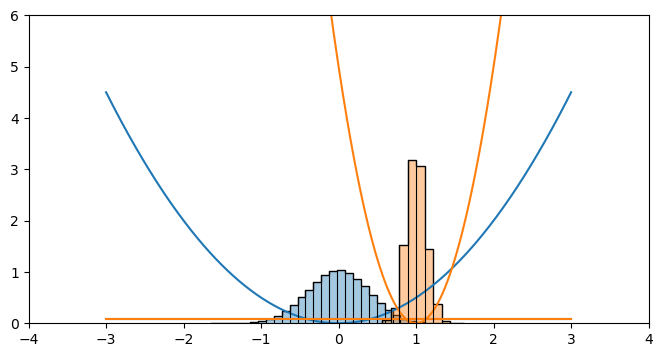

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim([-4.0, 4.0])
ax.set_ylim([0.0, 6.0])
colors = ["C0", "C1"]
for pot, color in zip(pots, colors):
    pot.get_v_avg
    pot.plot(ax, plot_range=[-3.0,3.0], color=color, bin_size=0.1)

In [5]:
for pot in pots:
    print(pot.v_avg)

0.0754278753995918
0.07762591224906507


In [6]:
pot_ref = pots[0]
pot_use = pots[1]

In [7]:
pot_use.use_H_pot_ref(H_ref=pot_ref)

In [8]:
pot_use.get_v_avg

0.07460172352568961